In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('ks-projects-201801.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [4]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [5]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [6]:
df[['category', 'main_category']].nunique()

category         159
main_category     15
dtype: int64

In [7]:
df['main_category'].value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [8]:
success_rate = round(df['state'].value_counts() / len(df['state']) * 100, 2)
success_rate

failed        52.22
successful    35.38
canceled      10.24
undefined      0.94
live           0.74
suspended      0.49
Name: state, dtype: float64

In [9]:
print('before: ', df.shape)
df = df[(df['state'] == 'failed') | (df['state'] == 'successful')]

df['state'] = df['state'].map({
    'failed': 0,
    'successful': 1
})
print('after: ', df.shape)

before:  (378661, 15)
after:  (331675, 15)


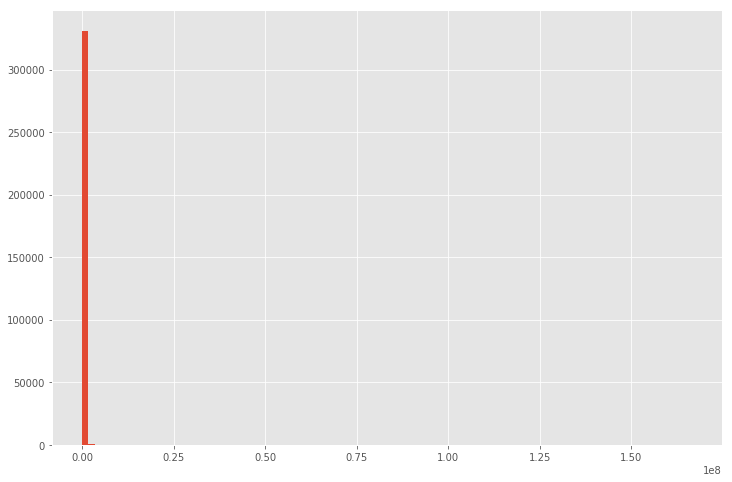

In [10]:
plt.figure(figsize=(12, 8))
plt.hist(df['usd_goal_real'], bins=100)
plt.show()

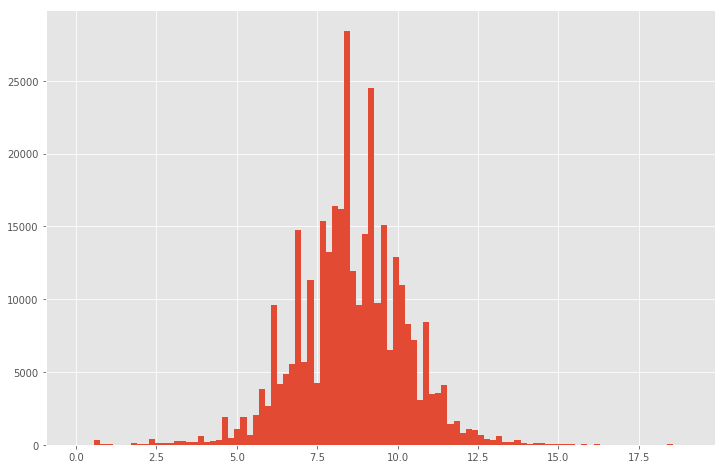

In [11]:
df['usd_goal_real'] = np.log1p(df['usd_goal_real'])

plt.figure(figsize=(12, 8))
plt.hist(df['usd_goal_real'], bins=100)
plt.show()

In [12]:
df['deadline'] = pd.to_datetime(df['deadline'], format='%Y-%m-%d %H:%M:%S')
df['launched'] = pd.to_datetime(df['launched'], format='%Y-%m-%d %H:%M:%S')

df['duration'] = (df['deadline'] - df['launched']).dt.days

df['quarter'] = df['launched'].dt.quarter
df['month'] = df['launched'].dt.month
df['year'] = df['launched'].dt.year
df['dayofweek'] = df['launched'].dt.dayofweek

df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration,quarter,month,year,dayofweek
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,7.336253,58,3,8,2015,1
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,10.308986,59,3,9,2017,5
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,10.714440,44,1,1,2013,5
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,8.517393,29,1,3,2012,5
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,US,52375.0,52375.0,10.819798,34,1,2,2016,4


In [13]:
df = df.drop(columns=['ID', 'goal', 'deadline', 'launched', 'pledged', 'backers', 'usd pledged', 'usd_pledged_real'])
df.head()

,name,category,main_category,currency,state,country,usd_goal_real,duration,quarter,month,year,dayofweek
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,0,GB,7.336253,58,3,8,2015,1
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,0,US,10.308986,59,3,9,2017,5
2,Where is Hank?,Narrative Film,Film & Video,USD,0,US,10.714440,44,1,1,2013,5
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,0,US,8.517393,29,1,3,2012,5
5,Monarch Espresso Bar,Restaurants,Food,USD,1,US,10.819798,34,1,2,2016,4


In [14]:
df['name_length'] = df['name'].str.len()
df['num_words'] = df['name'].apply(lambda x: len(str(x).split(' ')))
df.drop(columns=['name'], inplace=True)
df.head()

,category,main_category,currency,state,country,usd_goal_real,duration,quarter,month,year,dayofweek,name_length,num_words
0,Poetry,Publishing,GBP,0,GB,7.336253,58,3,8,2015,1,31.0,6
1,Narrative Film,Film & Video,USD,0,US,10.308986,59,3,9,2017,5,45.0,8
2,Narrative Film,Film & Video,USD,0,US,10.714440,44,1,1,2013,5,14.0,3
3,Music,Music,USD,0,US,8.517393,29,1,3,2012,5,49.0,7
5,Restaurants,Food,USD,1,US,10.819798,34,1,2,2016,4,20.0,3


In [15]:
df.isnull().sum()

category         0
main_category    0
currency         0
state            0
country          0
usd_goal_real    0
duration         0
quarter          0
month            0
year             0
dayofweek        0
name_length      3
num_words        0
dtype: int64

In [16]:
df['name_length'] = df['name_length'].fillna(0)

In [17]:
df = pd.get_dummies(df, ['category', 'main_category', 'currency', 'country'])
df.head()

,state,usd_goal_real,duration,quarter,month,year,dayofweek,name_length,num_words,category_3D Printing,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,0,7.336253,58,3,8,2015,1,31.0,6,0,...,0,0,0,0,0,0,0,0,0,0
1,0,10.308986,59,3,9,2017,5,45.0,8,0,...,0,0,0,0,0,0,0,0,0,1
2,0,10.714440,44,1,1,2013,5,14.0,3,0,...,0,0,0,0,0,0,0,0,0,1
3,0,8.517393,29,1,3,2012,5,49.0,7,0,...,0,0,0,0,0,0,0,0,0,1
5,1,10.819798,34,1,2,2016,4,20.0,3,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop(columns=['state'])
y = df['state']

print(X.shape)
print(y.shape)

(331675, 219)
(331675,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(265340, 219) (265340,)
(66335, 219) (66335,)


In [23]:
params = {
    'silent': 1,
    'max_depth': 6,
    'min_child_weight': 1,
    'eta': 0.1,
    'tree_method': 'exact',
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'predictor': 'cpu_predictor'
}

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

model = xgb.train(params=params,
                  dtrain=dtrain,
                  num_boost_round=1000,
                  early_stopping_rounds=5,
                  evals=[(dtest, 'test')])

[0]	test-logloss:0.679753
Will train until test-logloss hasn't improved in 5 rounds.
[1]	test-logloss:0.668724
[2]	test-logloss:0.659427
[3]	test-logloss:0.651628
[4]	test-logloss:0.644829
[5]	test-logloss:0.639183
[6]	test-logloss:0.634053
[7]	test-logloss:0.629716
[8]	test-logloss:0.625638
[9]	test-logloss:0.621958
[10]	test-logloss:0.61861
[11]	test-logloss:0.61566
[12]	test-logloss:0.612826
[13]	test-logloss:0.610482
[14]	test-logloss:0.608286
[15]	test-logloss:0.606092
[16]	test-logloss:0.604581
[17]	test-logloss:0.602868
[18]	test-logloss:0.601273
[19]	test-logloss:0.600046
[20]	test-logloss:0.598772
[21]	test-logloss:0.597464
[22]	test-logloss:0.596162
[23]	test-logloss:0.5951
[24]	test-logloss:0.594019
[25]	test-logloss:0.593213
[26]	test-logloss:0.592177
[27]	test-logloss:0.591158
[28]	test-logloss:0.590506
[29]	test-logloss:0.589724
[30]	test-logloss:0.58912
[31]	test-logloss:0.588313
[32]	test-logloss:0.587727
[33]	test-logloss:0.587035
[34]	test-logloss:0.586553
[35]	test-l

[296]	test-logloss:0.563664
[297]	test-logloss:0.563646
[298]	test-logloss:0.563627
[299]	test-logloss:0.563574
[300]	test-logloss:0.563605
[301]	test-logloss:0.563594
[302]	test-logloss:0.563606
[303]	test-logloss:0.563608
[304]	test-logloss:0.56361
Stopping. Best iteration:
[299]	test-logloss:0.563574



In [25]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(xgb.DMatrix(X_test), ntree_limit=model.best_ntree_limit)
predictions = [round(pred) for pred in y_pred]

acc = accuracy_score(y_test, predictions)
print(round(acc * 100, 2))

69.76


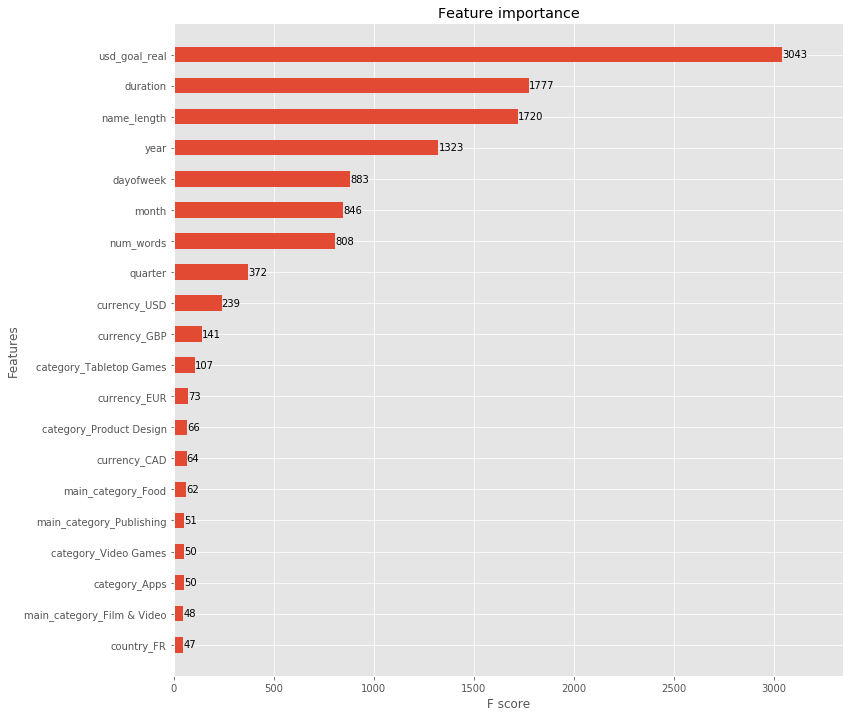

In [26]:
fig, ax = plt.subplots(figsize=(12, 12))
xgb.plot_importance(model, max_num_features=20, height= 0.5, ax=ax)
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [30]:
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)
    
    def fit(self, x, y):
        return self.clf.fit(x, y)
    
    def predict(self, x):
        return self.clf.predict(x)
    
    def predict_proba(self, x):
        return self.clf.predict_proba(x)

In [31]:
rfc_params = {
    'n_jobs': -1,
    'n_estimators': 500,
    'warm_start': True,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'verbose': 1
}

etc_params = {
    'n_jobs': -1,
    'n_estimators': 500,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 1
}

ada_params = {
    'n_estimators': 500,
    'learning_rate': 0.75
}

gbc_params = {
    'n_estimators': 500,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 1
}

In [32]:
rfc = SklearnHelper(RandomForestClassifier, seed=0, params=rfc_params).fit(X_train, y_train)
etc = SklearnHelper(ExtraTreesClassifier, seed=0, params=etc_params).fit(X_train, y_train)
ada = SklearnHelper(AdaBoostClassifier, seed=0, params=ada_params).fit(X_train, y_train)
gbc = SklearnHelper(GradientBoostingClassifier, seed=0, params=gbc_params).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.3min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.9min finished


      Iter       Train Loss   Remaining Time 
         1           1.3311          119.73m
         2           1.3160          116.16m
         3           1.3029          109.17m
         4           1.2917          107.77m
         5           1.2813          105.51m
         6           1.2728          104.52m
         7           1.2650          103.65m
         8           1.2580          103.39m
         9           1.2521          101.91m
        10           1.2461          101.69m
        20           1.2088           98.14m
        30           1.1883           87.80m
        40           1.1749           82.78m
        50           1.1663           77.11m
        60           1.1591           73.07m
        70           1.1538           69.12m
        80           1.1496           65.47m
        90           1.1461           63.10m
       100           1.1421           60.60m
       200           1.1227           39.60m
       300           1.1118           24.65m
       40

In [33]:
rfc_pred = rfc.predict_proba(X_train)
etc_pred = etc.predict_proba(X_train)
ada_pred = ada.predict_proba(X_train)
gbc_pred = gbc.predict_proba(X_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    4.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   11.4s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:   12.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    5.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   14.2s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:   15.9s finished


In [34]:
preds_train = pd.DataFrame({'rfc_pred': rfc_pred[:, 1],
                            'etc_pred': etc_pred[:, 1],
                            'ada_pred': ada_pred[:, 1],
                            'gbc_pred': gbc_pred[:, 1]})

preds_train.head()

,rfc_pred,etc_pred,ada_pred,gbc_pred
0,0.509308,0.540601,0.500736,0.779683
1,0.410226,0.405980,0.499536,0.326807
2,0.294653,0.356279,0.498241,0.044276
3,0.456229,0.457445,0.500262,0.612225
4,0.304202,0.303696,0.498580,0.132501
